# Here's a little bit about inner products, the Gram-Schmidt method, and orthogonal projection

## The dot product in $\mathbb{R}^3$

Let's use the sympy package for precise mathematical computations. 

In [ ]:
import sympy as sym 

In [ ]:
# Let's start with a basis for R^3
v1 = sym.Array([1,0,3])
v2 = sym.Array([1,0,5])
v3 = sym.Array([-2,11,4])
print('v1 =',v1)
print('v2 =',v2)
print('v3 =',v3)

In [ ]:
v3[2]

In [ ]:
# Define an inner product
def myip(v,w):
    return(v[0]*w[0]+v[1]*w[1]+v[2]*w[2])

In [7]:
def norm(v):
    return sym.sqrt(myip(v,v))

In [8]:
norm(v1)

sqrt(10)

In [9]:
e1 = 1/norm(v1)*v1
print(e1)

[sqrt(10)/10, 0, 3*sqrt(10)/10]


In [10]:
norm(e1)

1

Here we can define a vector b2 with the property that $span(e1,b2) = span(e1,v2)$ and $\langle e1,b2 \rangle =0$

In [11]:
b2 = v2 - myip(v2,e1)*e1 ## you'd normally divide by <e1,e1> but in this case, that number is 1.
print(b2)

[-3/5, 0, 1/5]


In [12]:
print(e1)

[sqrt(10)/10, 0, 3*sqrt(10)/10]


In [13]:
myip(b2,e1)

0

In [14]:
norm(b2)

sqrt(10)/5

In [15]:
e2 = b2/norm(b2)
print('the vector e2 is ',e2, 'and has norm', norm(e2))

the vector e2 is  [-3*sqrt(10)/10, 0, sqrt(10)/10] and has norm 1


In [16]:
b3 = v3 - myip(v3,e2)*e2 - myip(v3,e1)*e1 ## again, you'd normally have denominators <e2,e2> and <e1,e1> but those numbers are 1 here.
e3 = b3/norm(b3)
print(e3)

[0, 1, 0]


The result is an orthonormal basis for $\mathbb{R}^3$

In [17]:
obasis = [e1,e2,e3]
print('e1 =',e1)
print('e2 =',e2)
print('e3 =',e3)

e1 = [sqrt(10)/10, 0, 3*sqrt(10)/10]
e2 = [-3*sqrt(10)/10, 0, sqrt(10)/10]
e3 = [0, 1, 0]


In [18]:
## I think you can see that this is an orthonormal basis, but it doesn't hurt to have
## the computer check it.
for i in range(3):
    for j in range(3):
        print('i=',i,'j=',j,'inner product is',myip(obasis[i],obasis[j]))

i= 0 j= 0 inner product is 1
i= 0 j= 1 inner product is 0
i= 0 j= 2 inner product is 0
i= 1 j= 0 inner product is 0
i= 1 j= 1 inner product is 1
i= 1 j= 2 inner product is 0
i= 2 j= 0 inner product is 0
i= 2 j= 1 inner product is 0
i= 2 j= 2 inner product is 1


## Now let's look at an example using the space of continuous functions on $[-\pi,\pi]$ with the inner product defined by

$$\langle f,g \rangle := \int_{-\pi}^{\pi} f(x)g(x) dx$$

Let's just warm up with sympy

In [20]:
x = sym.Symbol("x")
myf = x**3+sym.sin(x)
myf

x**3 + sin(x)

In [21]:
sym.integrate(myf, x)

x**4/4 - cos(x)

In [22]:
sym.integrate(myf, (x,0,2*sym.pi))

4*pi**4

In [23]:
myf.subs({x:sym.pi})

pi**3

In [24]:
myf.subs({x:sym.pi}).evalf()

31.0062766802998

Let's redefine our inner product

In [26]:
def myip(f, g):
    return sym.integrate(f*g, (x, -sym.pi, sym.pi))

In [116]:
basis = [1, x, x**2, x**3]

## Gram-Schmidt procedure
It will be convenient to define the Gram-Schmidt process for any list of vectors and any inner product

In [117]:
def gramschmidt(listofvectors, ip): # input a list of vectors and an innerproduct
    obasis = [] # we'll start with an empty list and add the vectors in our orthonormal basis as we create them
    for v in listofvectors:
        for e in obasis: ## think inductively.  
            ## If we have e_1, e_2, ..., e_k and v=v_{k+1} we define e_{k+1} by
            ## e_{k+1}:= v - <e1,v>*e1 - <e2,v>*e2 - ... - <ek,v>*ek
            v -= ip(v, e) * e # take the old q and subtract <v,e> e for each e in the obasis
        norm = ip(v,v) 
        e = 1/sym.sqrt(norm) * v ## now normalize
        obasis.append(e)
    return(obasis)

In [118]:
orth_basis = gramschmidt(basis,myip)

In [119]:
orth_basis

[sqrt(2)/(2*sqrt(pi)),
 sqrt(6)*x/(2*pi**(3/2)),
 3*sqrt(10)*(x**2 - pi**2/3)/(4*pi**(5/2)),
 5*sqrt(14)*(x**3 - 3*pi**2*x/5)/(4*pi**(7/2))]

The precision here of using numbers like $\sqrt{14}$ and $4\pi^{\frac{7}{2}}$ are nice, but might make things look more complicated.  Here are numerical approximations:

In [120]:
[e.evalf() for e in orth_basis]

[0.398942280401433,
 0.219948406790773*x,
 0.135577175410079*x**2 - 0.446031029038193,
 0.0851039026947899*x**3 - 0.503965111551828*x]

We can check that the result is orthonormal

In [121]:
for i in range(3):
    for j in range(3):
        print('i=',i,'j=',j,'inner product is',myip(orth_basis[i],orth_basis[j]))

i= 0 j= 0 inner product is 1
i= 0 j= 1 inner product is 0
i= 0 j= 2 inner product is 0
i= 1 j= 0 inner product is 0
i= 1 j= 1 inner product is 1
i= 1 j= 2 inner product is 0
i= 2 j= 0 inner product is 0
i= 2 j= 1 inner product is 0
i= 2 j= 2 inner product is 1


In [122]:
myip(orth_basis[1],sym.sin(x))

sqrt(6)/sqrt(pi)

## Orthonormal projection

If $W$ is any subspace of an inner product space $V$ and $\langle \, ,\, \rangle$, we have an orthogonal projection operator $P:V \to W$ that sends any vector $v$ to a vector $Pv \in W$.  The vector $Pv$ solves the _minimization problem_ in the sense that $Pv$ is the vector in $W$ closest to $v$.  There is a simple formula for $Pv$ given by

$$P(v):=\langle v,e_1 \rangle e_1 + \langle v,e_2 \rangle e_2 + \cdots + \langle v,e_k \rangle e_k $$

where $e_1, ..., e_k$ is any orthonormal basis for $W$.

In [123]:
def project(func,onbasis,ip):
    n = len(onbasis)
    p = 0
    for e in onbasis:
        p += ip(func,e) * e 
    return(p)

In [124]:
deg3p = project(sym.sin(x),orth_basis,myip)

In [125]:
deg3p

3*x/pi**2 + 5*sqrt(14)*(x**3 - 3*pi**2*x/5)*(-5*sqrt(14)*(-2*pi**3/5 + 6*pi)/(4*pi**(7/2)) + 5*sqrt(14)*(-6*pi + 2*pi**3/5)/(4*pi**(7/2)))/(4*pi**(7/2))

In [126]:
deg3p.evalf() # let's approximate the polynomial with decimal coefficients

-0.0933876972831854*x**3 + 0.85698332779525*x

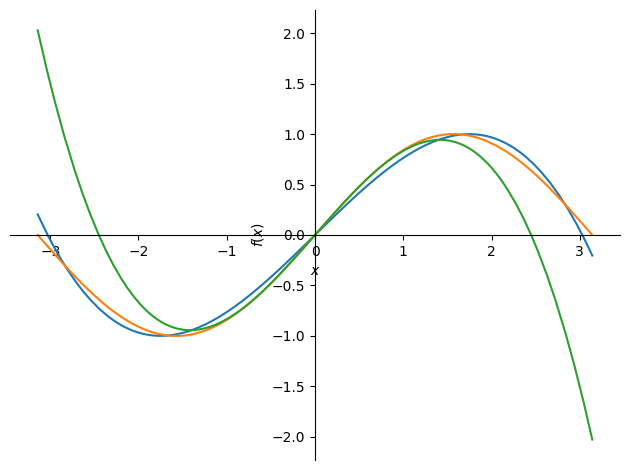

In [127]:
from sympy.plotting import plot
plot(deg3p,sym.sin(x),x-1/6*x**3,(x,-sym.pi,sym.pi))

Let's find the degree five polynomial closest to sin(x)

In [128]:
basis = [1, x, x**2, x**3,x**4,x**5]
orth_basis = gramschmidt(basis,myip)
deg5p = project(sym.sin(x),orth_basis,myip)
print('\n numerical approx of the solution is',deg5p.evalf())



 numerical approx of the solution is 0.00564311797634678*x**5 - 0.155271410633428*x**3 + 0.987862135574673*x


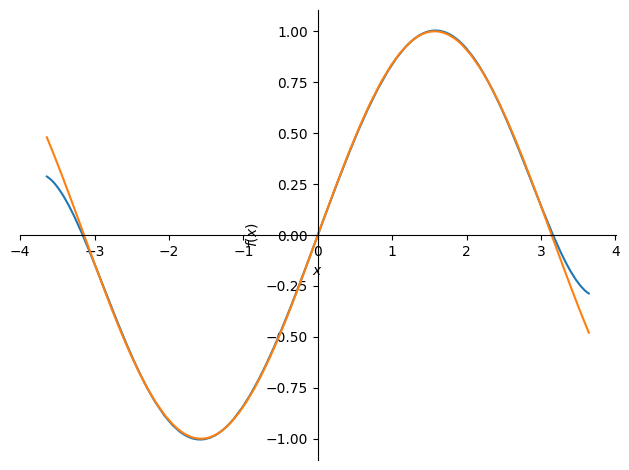

In [130]:
plot(deg5p,sym.sin(x),(x,-sym.pi-0.5,sym.pi+0.5)) 

Notice the result is so close, it's hard to distinguish the graph of the sine function from the graph of our degree five approximation on the interval $[\pi,\pi]$.

### Let's change the inner product 
By changing the inner product, we will arrive at a different notion of distance and then orthonormal projection onto $W$, the subspace of polynomials of degree less than or equal to $5$, will result in a different approximation of the sine function.  I'll use the inner product

$$\langle f, g \rangle := f(0)g(0)+f(2)g(2)+f(4)g(4)+f(6)g(6)+f(8)g(8)+f(10)g(10)$$

Notice that this formula for $\langle f, g \rangle$ defines an inner product on the subspace $W$.  On the space $V$ of all continuous functions, it's not non-degenerate since there are functions $f$ that are not the zero function for which $\langle f, f \rangle = 0$.  For example, $$f(x)=\frac{x(x-2)(x-4)(x-6)(x-8)(x-10)e^{x^2+1}}{\sqrt{1+3x^4}}$$.  In class (and in the notes I posted) I prove that in the context of this kind of "almost" inner product that the formula for orthogonal projection still solves the minimization problem.

Now, before going on, let me illustrate how you evaluate a function of x at a particular value in sympy.

In [134]:
print((x**3+2*x).subs({x:10}))
print((sym.sin(x)).subs({x:10}))
print((sym.sin(x)).subs({x:10.0})) # putting in a floating point number automatically returns a numerical approx

1020
sin(10)
-0.544021110889370


In [137]:
def myip2(f, g):
    values = [f.subs({x:i})*g.subs({x:i}) for i in [0,2,4,6,8,10]] # make the list of products of values
    return sum(values).evalf() # then add them up and return the result

In [138]:
myip2(sym.sin(x),x**5)

-24901.4232151138

Since this inner product involes substituting numerical values for the variable x, we'll express the number 1 (which is our first basis vector) as $x^0$ since otherwise, we'll get a python error.  Look:

In [61]:
f=1
f.subs({x:3})

AttributeError: 'int' object has no attribute 'subs'

In [64]:
f=(x**0)
f.subs({x:3})

1

In [65]:
basis=[x**0, x, x**2, x**3, x**4, x**5]
basis

[1, x, x**2, x**3, x**4, x**5]

Be careful:  notice that both the integer 1 and x**0 are printed the same way, as "1" even though they have different types.

In [93]:
type(1)

int

In [94]:
type(x**0)

sympy.core.numbers.One

In [92]:
orth_basis2 = gramschmidt(basis,myip2)

Notice that in the definition of my inner product myip2, I use evalf() to return numerical approximations.  This was probably not necessary, and possibly even a bad decision for it makes our gram-schmidt process return something very very close to an orthonormal basis, but not quite:

In [95]:
for i in range(5):
    for j in range(5):
        print('i=',i,'j=',j,'inner product is',myip2(orth_basis2[i],orth_basis2[j]))

i= 0 j= 0 inner product is 1.00000000000000
i= 0 j= 1 inner product is -1.94289029309402e-16
i= 0 j= 2 inner product is 5.55111512312578e-17
i= 0 j= 3 inner product is 1.94289029309402e-16
i= 0 j= 4 inner product is -3.52357032440409e-14
i= 1 j= 0 inner product is -1.94289029309402e-16
i= 1 j= 1 inner product is 1.00000000000000
i= 1 j= 2 inner product is 3.88578058618805e-16
i= 1 j= 3 inner product is 2.77555756156289e-17
i= 1 j= 4 inner product is -2.25097718242750e-14
i= 2 j= 0 inner product is 5.55111512312578e-17
i= 2 j= 1 inner product is 3.88578058618805e-16
i= 2 j= 2 inner product is 1.00000000000000
i= 2 j= 3 inner product is 5.82867087928207e-16
i= 2 j= 4 inner product is -3.26128013483640e-15
i= 3 j= 0 inner product is 1.94289029309402e-16
i= 3 j= 1 inner product is 2.77555756156289e-17
i= 3 j= 2 inner product is 5.82867087928207e-16
i= 3 j= 3 inner product is 1.00000000000000
i= 3 j= 4 inner product is -1.10883524584438e-14
i= 4 j= 0 inner product is -3.52357032440409e-14
i

Let's try to clean up these inner products a bit and organize them into a table:

In [96]:
from tabulate import tabulate
table = [[myip2(orth_basis2[i],orth_basis2[j]) for i in range(5)] for j in range(5)]
print(tabulate(table, tablefmt='fancy_grid'))

╒══════════════╤══════════════╤══════════════╤══════════════╤══════════════╕
│  1           │ -1.94289e-16 │  5.55112e-17 │  1.94289e-16 │ -3.52357e-14 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ -1.94289e-16 │  1           │  3.88578e-16 │  2.77556e-17 │ -2.25098e-14 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  5.55112e-17 │  3.88578e-16 │  1           │  5.82867e-16 │ -3.26128e-15 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│  1.94289e-16 │  2.77556e-17 │  5.82867e-16 │  1           │ -1.10884e-14 │
├──────────────┼──────────────┼──────────────┼──────────────┼──────────────┤
│ -3.52357e-14 │ -2.25098e-14 │ -3.26128e-15 │ -1.10884e-14 │  1           │
╘══════════════╧══════════════╧══════════════╧══════════════╧══════════════╛


Better yet, let's zero out those floating point numbers that are almost zero to machine precision.  We'll use the function available in the math library called "isclose".  I'm not saying it's a good practice to first call a numerical approximation like evalf() and then go back and return 0 if a later result is close to 0.  I just want to show you some of the things you can do in python.

In [101]:
from math import isclose
def makezeroifclose(x):
    if isclose(x,0,abs_tol=1e-9): return 0 ## return 0 if |x| < 10^(-9)
    else: return x

In [102]:
makezeroifclose(3.442)

3.442

In [103]:
makezeroifclose(9.4323e-13)

0

In [104]:
from tabulate import tabulate
table = [[makezeroifclose(myip2(orth_basis2[i],orth_basis2[j])) for i in range(5)] for j in range(5)]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══╤═══╤═══╤═══╤═══╕
│ 1 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 1 │
╘═══╧═══╧═══╧═══╧═══╛


Now let's do the orthogonal projection using this other inner product

solution 
 0.000997277281565862*x**5 - 0.0357554009431181*x**4 + 0.427647172081707*x**3 - 2.00632974849076*x**2 + 3.02680629310743*x + 1.7576218258597e-14


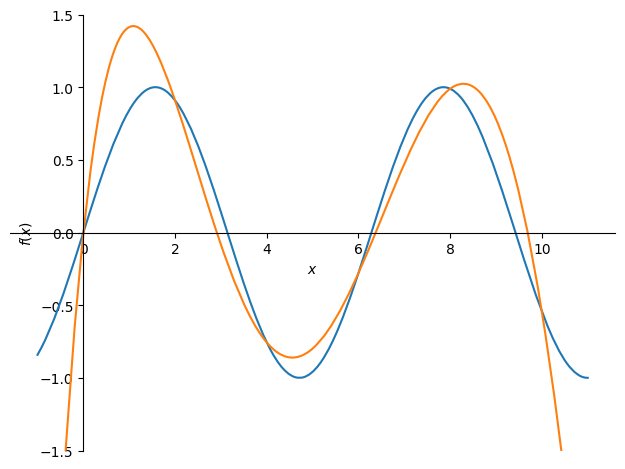

In [105]:
deg5p2 = project(sym.sin(x),orth_basis2,myip2)
print('solution \n', deg5p2)
plot(sym.sin(x),deg5p2,(x,-1,11),ylim=[-1.5,1.5])

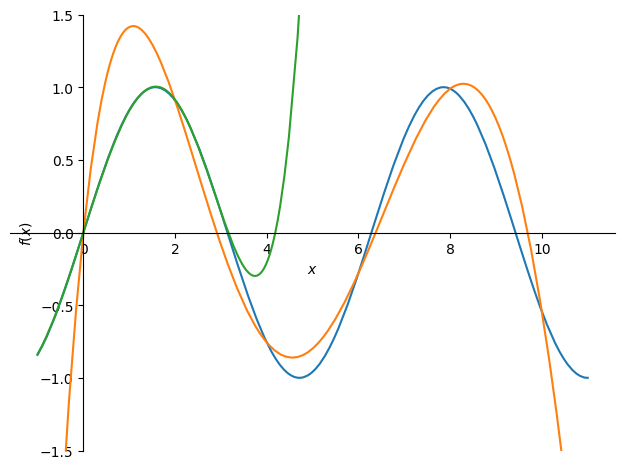

In [106]:
from sympy.plotting import plot
plot(sym.sin(x),deg5p2,deg5p,(x,-1,11),ylim=[-1.5,1.5])

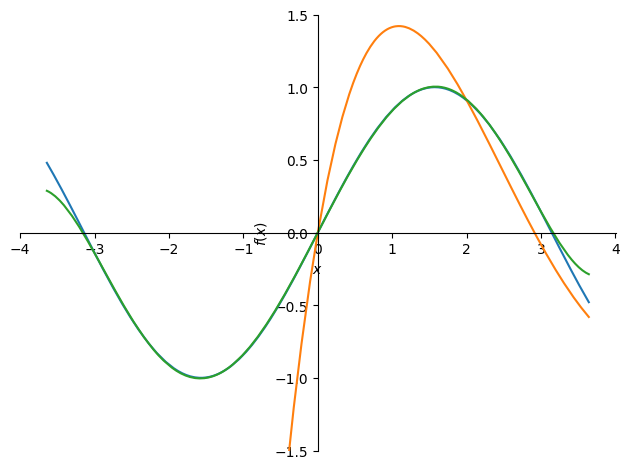

In [108]:
from sympy.plotting import plot
plot(sym.sin(x),deg5p2,deg5p,(x,-sym.pi-0.5,sym.pi+0.5),ylim=[-1.5,1.5])